In [1]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt
import time
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# List of subfolders
subfolders = ["beyza", "zeynep", "ezgi"]

# Set the path to the root directory
root_path = r"C:\Users\Beyza\Desktop\project"

images = []
labels = []

valid_extensions = {".jpg", ".jpeg", ".png"}

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)

    for folder_name in os.listdir(subfolder_path):
        folder_path = os.path.join(subfolder_path, folder_name)
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                if any(file_name.lower().endswith(ext) for ext in valid_extensions):
                    image_path = os.path.join(folder_path, file_name)
                    # Extract class information from the file name (assuming it is between the first '_' and the file extension)
                    label = file_name.split('_')[1]
                    img = cv2.imread(image_path)
                    if img is None:
                        print(f"Failed to load image: {image_path}")
                    else:
                        img = cv2.resize(img, (64, 64))
                        images.append(img)
                        labels.append(label)

In [18]:
# Print unique labels
unique_labels = set(labels)
print("Unique Labels:", unique_labels)


Unique Labels: {'H', 'Gtr', 's', 'A', 'K', 'a', 'q', 'F', 'b', 'g', 'm', 'gtr', 'x', 'w', 'ctr', 'D', 'M', 'l', 'N', 'P', 'T', 'j', 'X', 'd', 'J', 'z', 'Utr', 'L', 'o', 'U', 'Otr', 'p', 'str', 'Y', 'f', 'y', 'O', 'G', 'i', 'utr', 'k', 'S', 'h', 'r', 'v', 'Ctr', 'C', 't', 'V', 'E', 'I', 'c', 'R', ' ', 'Z', 'otr', 'W', 'Q', 'e', 'Str', 'n', 'B', 'u'}


In [3]:
images = np.array(images)
labels = np.array(labels)

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

images = images / 255.0

In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

In [5]:
# Define the CNN model with glorot_uniform initializer
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

C:\Users\Beyza\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
# Define the optimizer with a custom learning rate (e.g., 0.001)
custom_learning_rate = 0.001
custom_optimizer = Adam(learning_rate=custom_learning_rate)

In [7]:
# Create an image data generator
datagen = ImageDataGenerator(rescale=1./255)

In [8]:
# Compile the model with the custom optimizer
model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Create a generator for training data
train_generator = datagen.flow(X_train, y_train, batch_size=32)

# Create a generator for validation data
validation_generator = datagen.flow(X_test, y_test, batch_size=32)

In [10]:
# Record the start time before compilation
start_time = time.time()

In [11]:
# Train the model
history_2 = model.fit(X_train, y_train, epochs=40, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 30s 104ms/step - accuracy: 0.0216 - loss: 4.1328 - val_accuracy: 0.0874 - val_loss: 3.8611
Epoch 2/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 26s 98ms/step - accuracy: 0.1523 - loss: 3.4819 - val_accuracy: 0.2851 - val_loss: 2.7239
Epoch 3/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 26s 97ms/step - accuracy: 0.3682 - loss: 2.4090 - val_accuracy: 0.4201 - val_loss: 2.1227
Epoch 4/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 27s 98ms/step - accuracy: 0.5325 - loss: 1.6808 - val_accuracy: 0.5548 - val_loss: 1.6452
Epoch 5/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 26s 98ms/step - accuracy: 0.6317 - loss: 1.2982 - val_accuracy: 0.5103 - val_loss: 1.7859
Epoch 6/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 28s 104ms/step - accuracy: 0.6926 - loss: 1.0942 - val_accuracy: 0.4913 - val_loss: 1.9195
Epoch 7/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 27s 104ms/step - accuracy: 0.7037 - loss: 1.0531 - val_accuracy: 0.6949 - val_loss: 1.1015
Epoch 8/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 26s 97ms/step - accuracy: 0.8013 - loss: 0.6874

In [12]:
# Record the end time after compilation
end_time = time.time()

# Calculate and print the compilation time
compilation_time = end_time - start_time
print(f"Model compilation time: {compilation_time} seconds")

Model compilation time: 1084.996309518814 seconds


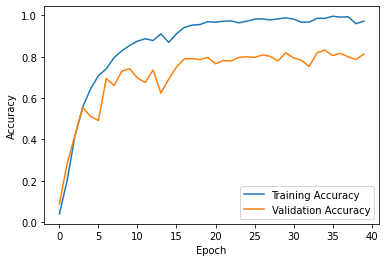

In [13]:
# Plot accuracy and validation accuracy graphs
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy * 100:.2f}%')

132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8155 - loss: 1.0031
Test loss: 1.0185, Test accuracy: 81.28%


132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


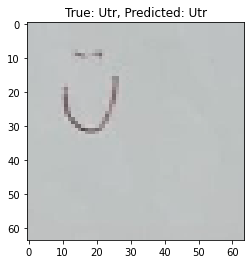

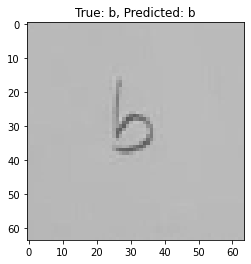

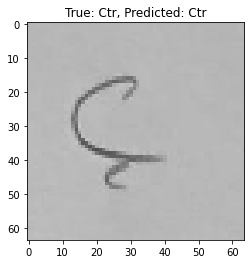

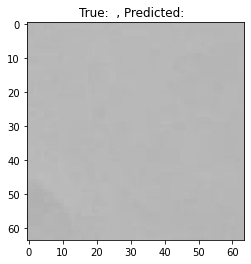

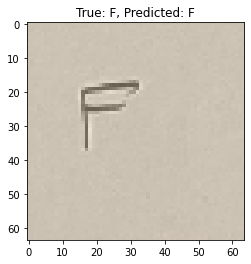

In [15]:
# Use the trained model to predict classes on the test set
predictions = model.predict(X_test)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Decode the encoded labels back to the original labels
decoded_predicted_labels = label_encoder.inverse_transform(predicted_labels)
decoded_true_labels = label_encoder.inverse_transform(y_test)

# Display only the true predicted images
num_images_to_display = 5
count = 0

for i in range(len(X_test)):
    if decoded_true_labels[i] == decoded_predicted_labels[i]:
        plt.figure(figsize=(4, 4))
        plt.imshow(X_test[i])
        plt.title(f"True: {decoded_true_labels[i]}, Predicted: {decoded_predicted_labels[i]}")
        plt.show()
        count += 1

        if count == num_images_to_display:
            break


132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


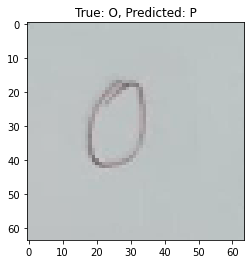

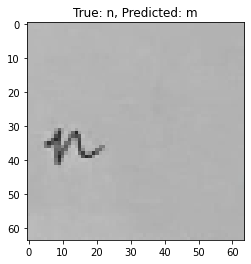

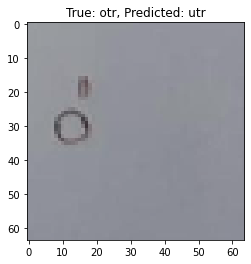

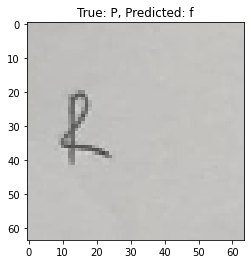

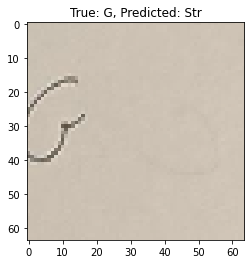

In [16]:
# Use the trained model to predict classes on the test set
predictions = model.predict(X_test)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Decode the encoded labels back to the original labels
decoded_predicted_labels = label_encoder.inverse_transform(predicted_labels)
decoded_true_labels = label_encoder.inverse_transform(y_test)

# Display only the wrong predicted images
num_wrong_images_to_display = 5
count = 0

for i in range(len(X_test)):
    if decoded_true_labels[i] != decoded_predicted_labels[i]:
        plt.figure(figsize=(4, 4))
        plt.imshow(X_test[i])
        plt.title(f"True: {decoded_true_labels[i]}, Predicted: {decoded_predicted_labels[i]}")
        plt.show()
        count += 1

        if count == num_wrong_images_to_display:
            break
